# Grid method of solving boundary problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h = 0.01
h_2 = 0.02
a = 0
b = 1
sigma0 = 1
mu0 = 0
sigma1 = 1
mu1 = 2 + 3 * np.exp(1)

def u(x):
    return x + np.exp(x ** 2)

def p(x):
    return -2 * x

def q(x):
    return 2

def F(x):
    return 4 * x

In [3]:
def sweep_method(ax, bx, h, p, q, F, sigma0, mu0, sigma1, mu1):
    N = int((bx - ax) / h)
    x = [h * i for i in range(N + 1)]
    a = [0] * (N + 1)
    b = [0] * (N + 1)
    c = [0] * (N + 1)
    f = [0] * (N + 1)
    
    c[0]= 1 / h + sigma0 - h / 2 * p(ax) * sigma0 + h / 2 * q(ax)
    b[0] = 1 / h
    f[0] = mu0 + h / 2 * F(ax) - h / 2 * p(ax) * mu0
    c[N] = 1 / h + sigma1 + h / 2 * p(bx) * sigma1 + h / 2 * q(bx)
    a[N] = 1 / h
    f[N] = mu1 + h / 2 * F(bx) + h / 2 * p(bx) * mu1
    
    for i in range(1, N):
        a[i] = 1 / h ** 2 - p(x[i]) / (2 * h)
        b[i] = 1 / h ** 2 + p(x[i]) / (2 * h)
        c[i] = 2 / h ** 2 + q(x[i])
        f[i] = F(x[i])
    
    alpha = [0] * (N + 1)
    beta = [0] * (N + 1)
    y = [0] * (N + 1) 
    alpha[1] = b[0] / c[0]
    beta[1] = f[0] / c[0]
    
    for i in range(1, N):
        alpha[i + 1] = b[i] / (c[i] - alpha[i] * a[i])
        beta[i + 1] = (f[i] + a[i] * beta[i]) / (c[i] - alpha[i] * a[i])
    
    y[N] = (f[N] + a[N] * beta[N]) / (c[N] - alpha[N] * a[N])
    for i in range(N - 1, -1, - 1):
        y[i] = alpha[i + 1] * y[i + 1] + beta[i + 1]
    
    return x, y

In [4]:
x, y = sweep_method(a, b, h, p, q, F, sigma0, mu0, sigma1, mu1)
x_2, y_2 = sweep_method(a, b, h_2, p, q, F, sigma0, mu0, sigma1, mu1)

In [5]:
u_values = [u(xi) for xi in x]
print(np.linalg.norm(np.subtract(u_values, y), np.inf))

0.00025994048291355654


In [8]:
u_values_2 = [u(xi) for xi in x_2]
print(np.linalg.norm(np.subtract(u_values_2, y_2), np.inf))

0.0010397539335929018


In [9]:
y_comp = y[::2]
print(np.linalg.norm(np.subtract(y_2, y_comp), np.inf) / 3)

0.00025993781689311507


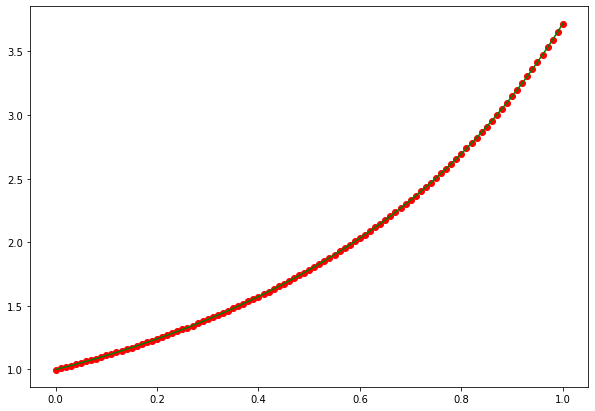

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(x, u_values, c='g')
plt.scatter(x, y, c='r')
plt.show()